In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Loading the Dataset

In [45]:
df = pd.read_csv('/content/titanic_dataset .csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Setting Passenger Id as the index

In [47]:
df.set_index('PassengerId', inplace=True)

In [48]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking basic details of the dataset

In [49]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [51]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [52]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

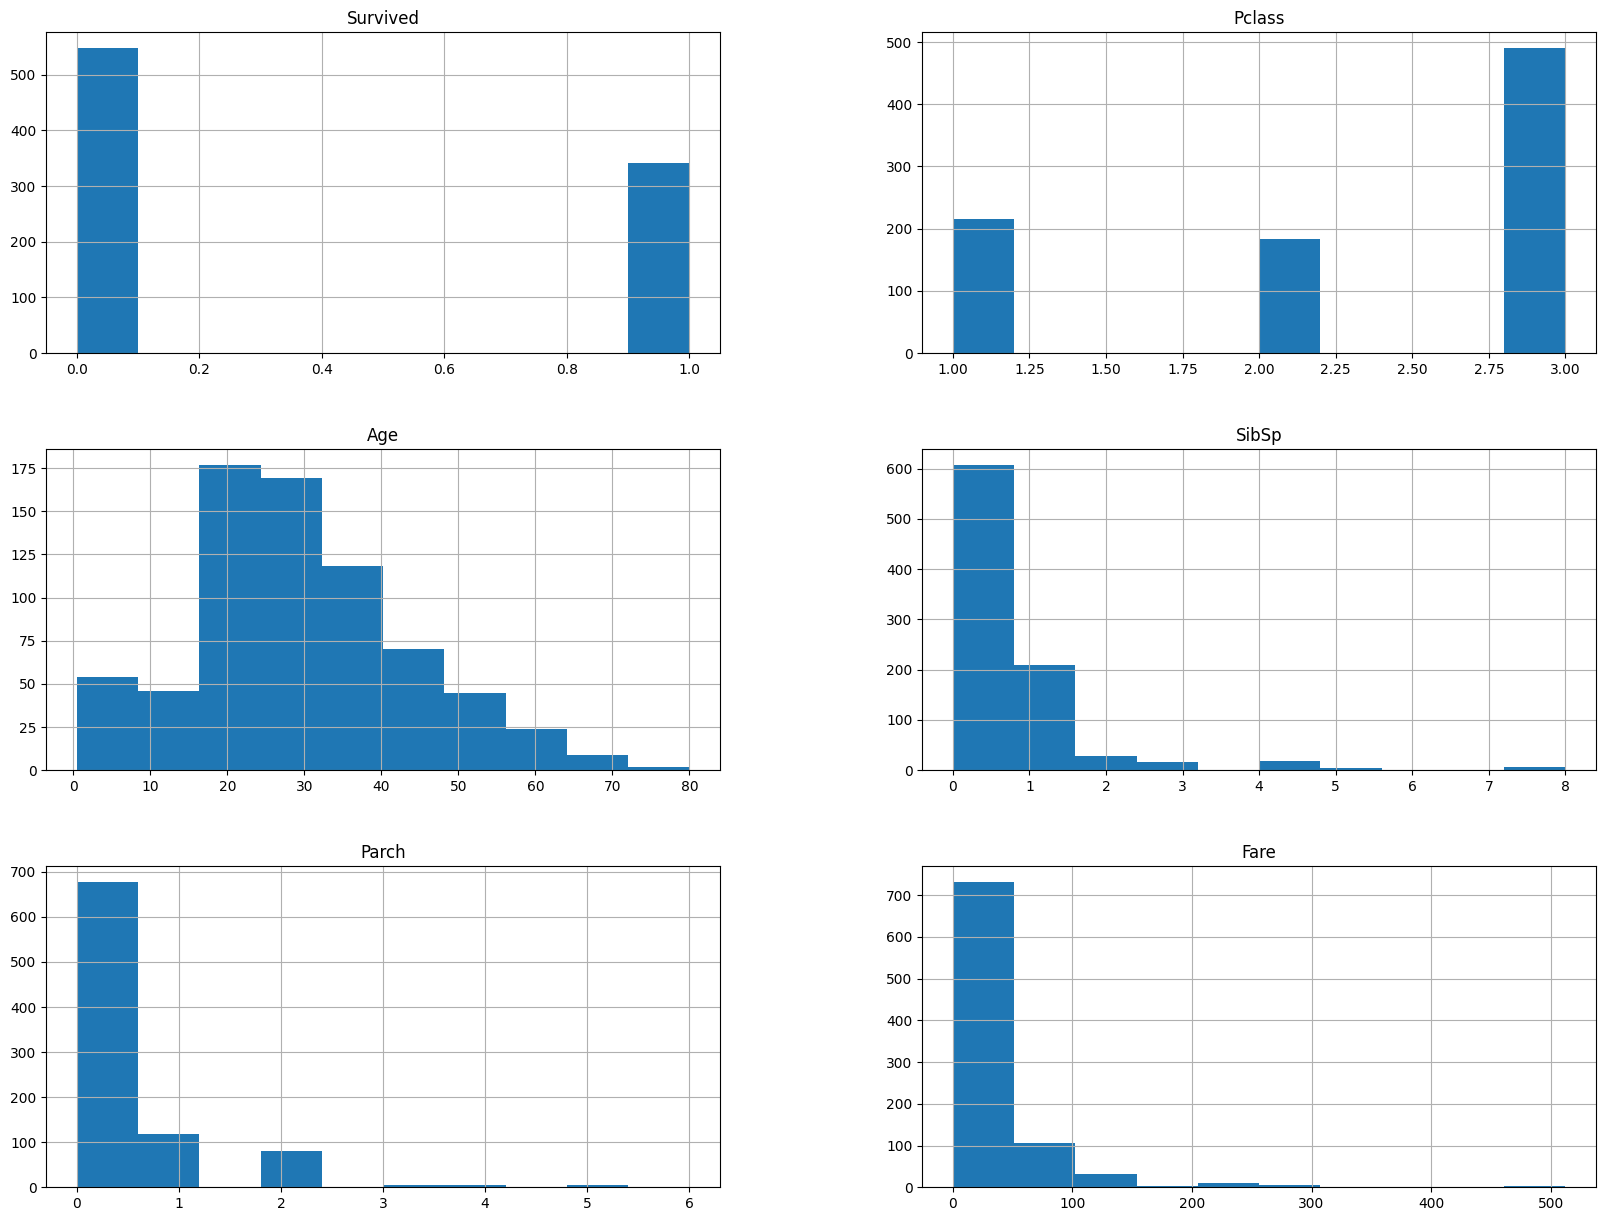

In [53]:
freqgraph = df.select_dtypes(include=['float64','int64','object'])
freqgraph.hist(figsize=(20,15))

Filling in missing values

In [54]:
df['Age']= df['Age'].fillna(df['Age'].median())
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])
df['Embarked']= df['Embarked'].fillna(df['Embarked'].mode()[0])

In [55]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

Dropping Unnecessary Columns

In [56]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [57]:
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

Handling Outliers

In [58]:
df.Age.skew()

0.5102446555756495

In [59]:
df.Fare.skew()

4.787316519674893

In [60]:
df.SibSp.skew()

3.6953517271630565

In [61]:
new_columns = ['Age','Fare','SibSp']

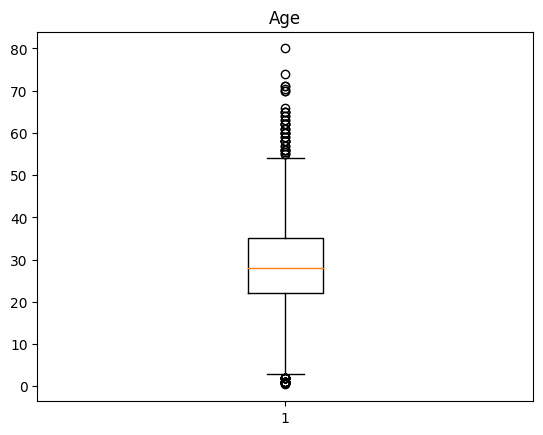

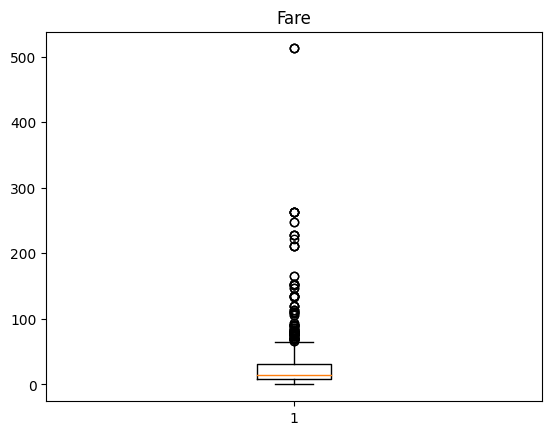

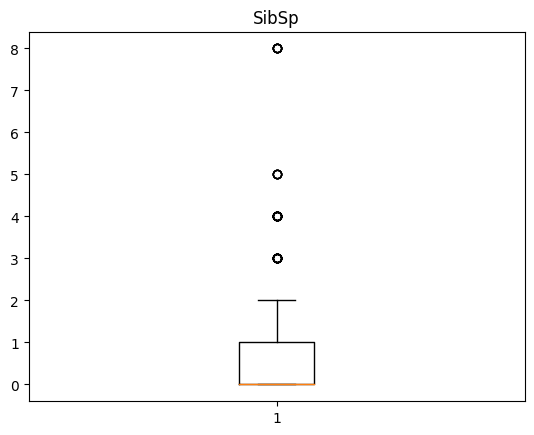

In [62]:
for i in new_columns:
  plt.figure(i)
  plt.boxplot(df[i])
  plt.title(i);

In [63]:
for j in ['Age','Fare','SibSp']:
    Q1=np.percentile(df[j],25,method='midpoint')
    Q2=np.percentile(df[j],50,method='midpoint')
    Q3=np.percentile(df[j],75,method='midpoint')
    IQR = Q3-Q1
    low_lim = Q1-1.5*IQR
    up_lim = Q3+1.5*IQR
    outliers = []
    for h in df[j]:
        if ((h < low_lim) | (h > up_lim)):
            outliers.append(h)
    df[j]=df[j].clip(lower=low_lim,upper=up_lim)

In [64]:
new_columns2 = ['Age','Fare','SibSp']

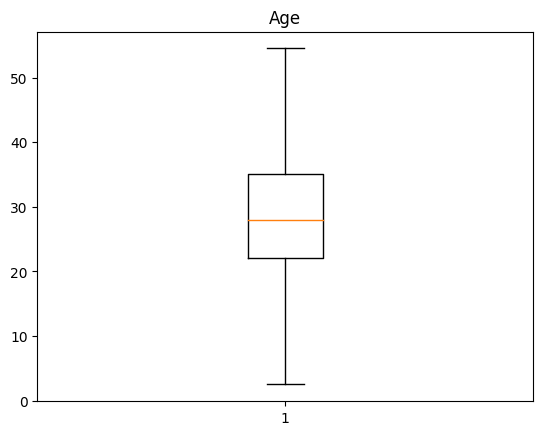

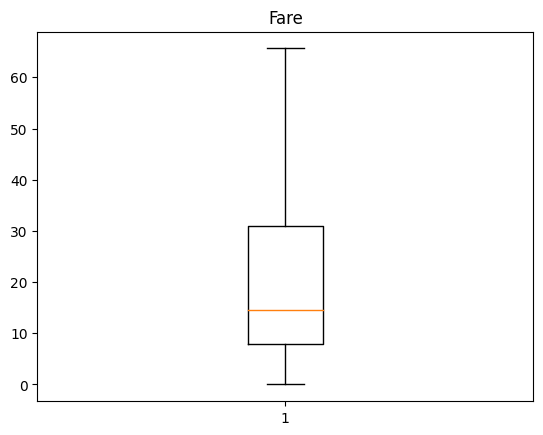

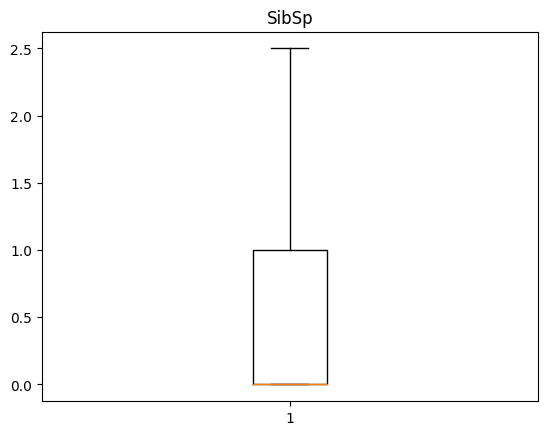

In [65]:
for z in new_columns2:
  plt.figure(z)
  plt.boxplot(df[z])
  plt.title(z);

Encoding categorical variables

In [66]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

Finding Correlation

In [67]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.060622,0.031434,0.081629,0.317430,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.340404,0.023180,0.018443,-0.715300,0.162098
Sex,-0.543351,0.131900,1.000000,0.074740,-0.167885,-0.245489,-0.234969,0.108262
Age,-0.060622,-0.340404,0.074740,1.000000,-0.247806,-0.178959,0.144544,-0.018200
SibSp,0.031434,0.023180,-0.167885,-0.247806,1.000000,0.409366,0.349615,0.038362
Parch,0.081629,0.018443,-0.245489,-0.178959,0.409366,1.000000,0.292616,0.039798
Fare,0.317430,-0.715300,-0.234969,0.144544,0.349615,0.292616,1.000000,-0.199827
Embarked,-0.167675,0.162098,0.108262,-0.018200,0.038362,0.039798,-0.199827,1.000000


<Axes: >

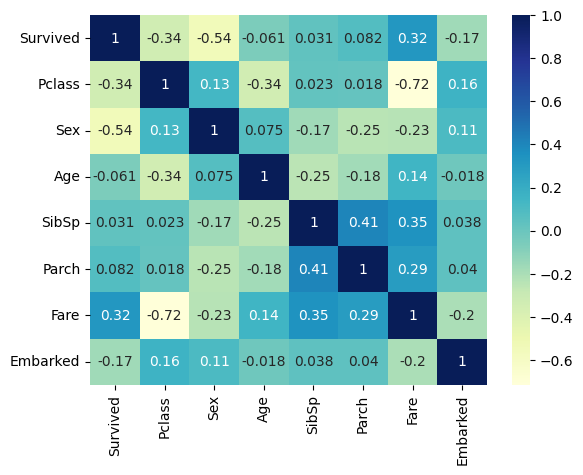

In [68]:
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)

Train Test Split

In [69]:
x = df.drop('Survived', axis=1)
y = df['Survived']

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

In [71]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)

In [72]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [73]:
from sklearn.metrics import classification_report

## KNN

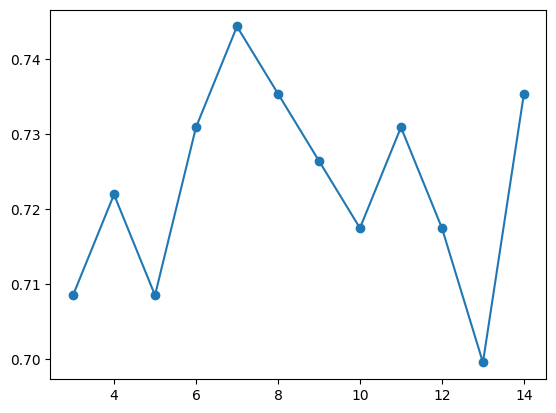

In [74]:
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k,metric='manhattan')
    knn.fit(x_train,y_train)
    knn_pred=knn.predict(x_test)
    metric_k.append(accuracy_score(y_test,knn_pred))
plt.plot(neighbors,metric_k,'o-')
plt.show()

In [75]:
#Highest accuracy is for k = 7, So choosing it for classification.
knn=KNeighborsClassifier(n_neighbors=7,metric='manhattan')
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
print('Accuracy of KNN Classifier is', round(accuracy_score(y_test,knn_pred)*100,2))

Accuracy of KNN Classifier is 74.44


## SVM

In [76]:
svm=SVC(class_weight='balanced')
svm.fit(x_train,y_train)
svm_pred=svm.predict(x_test)
print('Accuracy of SVM Classifier is', round(accuracy_score(y_test,svm_pred)*100,2))

Accuracy of SVM Classifier is 71.75


### **Cross Validation**

# KFold

In [78]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
kfold_validator=KFold(10,shuffle=True,random_state=42)

KNN


In [79]:
cv_result_knn=cross_val_score(knn,x,y,cv=kfold_validator)
print('Average cross validation score of KNN classifier is', cv_result_knn.mean())

Average cross validation score of KNN classifier is 0.7328214731585518


SVM

In [80]:
cv_result_svm=cross_val_score(svm,x,y,cv=kfold_validator)
print('Average cross validation score of SVM classifier is', cv_result_svm.mean())

Average cross validation score of SVM classifier is 0.6678027465667914


# Stratified K Fold

In [81]:
strat_validator=StratifiedKFold(n_splits=10,shuffle=True,random_state=10)

KNN

In [82]:
str_cv_result_knn=cross_val_score(knn,x,y,cv=strat_validator)
print('Average cross validation score of KNN classifier is',str_cv_result_knn.mean())

Average cross validation score of KNN classifier is 0.7351560549313358


SVM

In [83]:
str_cv_result_svm=cross_val_score(svm,x,y,cv=strat_validator)
print('Average cross validation score of SVM classifier is', str_cv_result_svm.mean())

Average cross validation score of SVM classifier is 0.6576404494382022


Conclusion: For both cross validation techniques, KNN performs better than SVM